In [1]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
df= pd.read_csv("/content/placement.csv")

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [6]:
df=df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


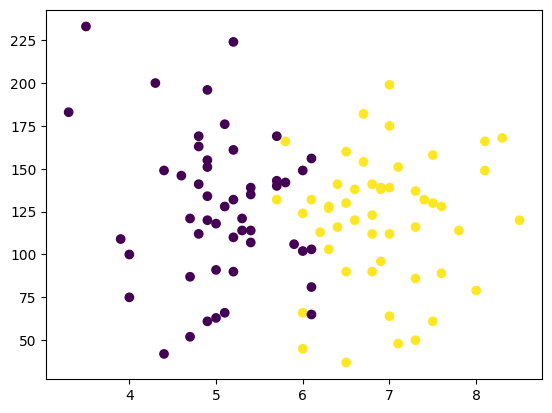

In [10]:
plt.scatter(df['cgpa'],df['iq'],c=[df['placement']])

In [19]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [20]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [17]:
X_train

,cgpa,iq
41,5.4,114.0
15,5.1,176.0
27,6.0,124.0
49,5.4,135.0
3,7.4,132.0
...,...,...
87,5.7,132.0
23,4.7,87.0
16,5.2,224.0
77,7.3,50.0


In [22]:
Y_train

,placement
32,1
76,0
1,0
38,1
68,0
...,...
48,1
45,1
89,0
66,1


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Scaler object
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [ ]:
# Training the model
model.fit(X_train,Y_train)

In [29]:
y_pred = model.predict(X_test)

In [28]:
Y_test

,placement
39,0
99,1
86,0
85,1
15,0
25,0
51,0
47,0
95,0
61,1


In [30]:
from sklearn.metrics import accuracy_score


In [31]:
accuracy_score(Y_test,y_pred)

0.9

In [32]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

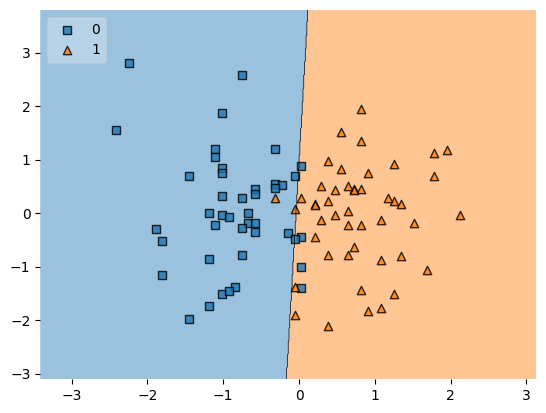

In [33]:
plot_decision_regions(X_train, Y_train.values, clf=model, legend=2)

In [34]:
import pickle

In [36]:
pickle.dump(model,open('model.pkl','wb'))